In [1]:
from keras.layers import Dense
from keras import models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from joblib import dump

In [2]:
df = pd.read_csv('dataset.csv', sep=',')
df['Height'] = df['Height'] * 2.54
df['Weight'] = df['Weight'] * 0.453592
df.replace(['Female', 'Male'], [0, 1], inplace=True)
df

,Gender,Height,Weight
0,1,187.571423,109.720985
1,1,174.706036,73.622732
2,1,188.239668,96.497550
3,1,182.196685,99.809504
4,1,177.499761,93.598619
...,...,...,...
9995,0,168.078536,62.041159
9996,0,170.350573,77.504315
9997,0,162.224700,58.275377
9998,0,175.346978,74.322166


In [3]:
scaler = StandardScaler()

In [4]:
X = scaler.fit_transform(df.drop(['Gender'], axis=1))

In [5]:
y = df['Gender']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=df['Gender'])

Epoch 1/30
219/219 [==============================] - 2s 3ms/step - loss: 0.5826 - accuracy: 0.7770 - val_loss: 0.4505 - val_accuracy: 0.8943
Epoch 2/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4185 - accuracy: 0.9107 - val_loss: 0.3926 - val_accuracy: 0.9153
Epoch 3/30
219/219 [==============================] - 0s 2ms/step - loss: 0.3754 - accuracy: 0.9180 - val_loss: 0.3597 - val_accuracy: 0.9183
Epoch 4/30
219/219 [==============================] - 0s 2ms/step - loss: 0.3452 - accuracy: 0.9179 - val_loss: 0.3351 - val_accuracy: 0.9190
Epoch 5/30
219/219 [==============================] - 0s 2ms/step - loss: 0.3203 - accuracy: 0.9186 - val_loss: 0.3096 - val_accuracy: 0.9190
Epoch 6/30
219/219 [==============================] - 0s 2ms/step - loss: 0.2998 - accuracy: 0.9174 - val_loss: 0.2916 - val_accuracy: 0.9187
Epoch 7/30
219/219 [==============================] - 0s 2ms/step - loss: 0.2831 - accuracy: 0.9186 - val_loss: 0.2796 - val_accuracy: 0.9137
Epoch 

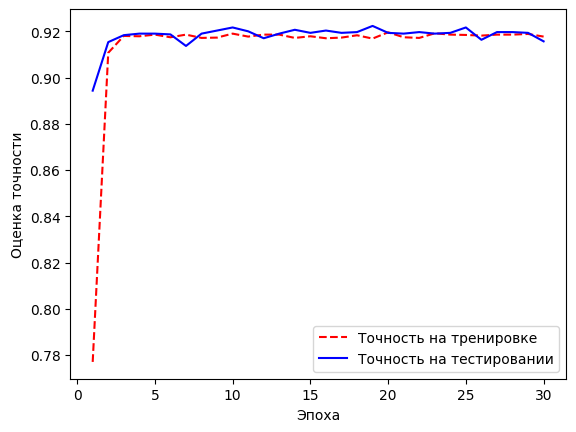

In [7]:
network = models.Sequential()
network.add(Dense(16, activation='relu', input_shape = (None, 1, 2)))
network.add(Dense(14, activation='relu'))
network.add(Dense(12, activation='relu'))
network.add(Dense(10, activation='relu'))
network.add(Dense(8, activation='relu'))
network.add(Dense(6, activation='relu'))
network.add(Dense(4, activation='relu'))
network.add(Dense(2, activation='relu'))
network.add(Dense(1, activation='sigmoid'))

network.compile(
    optimizer='rmsprop', 
    loss='binary_crossentropy',
    metrics=['accuracy']
)

callbacks = [ModelCheckpoint(filepath="Network.h5", 
monitor="val_loss", 
save_best_only=True)]


history = network.fit(
    X_train, y_train, 
    epochs=30,
    validation_data=(X_test, y_test), 
    callbacks=callbacks
)


training_accuracy = history.history['accuracy'] 
test_accuracy = history.history['val_accuracy']
plt.plot(range(1, 30 + 1), training_accuracy, "r--") 
plt.plot(range(1, 30 + 1), test_accuracy, "b-")

plt.legend(["Точность на тренировке",
"Точность на тестировании"]) 
plt.xlabel("Эпоха") 
plt.ylabel("Оценка точности") 
plt.show();

In [8]:
network.save('Network.h5')
dump(scaler, 'std_scaler.bin')

['std_scaler.bin']